In [11]:
from iertools.read import *

In [7]:
f = 'data/Casablanca.epw'
epw = read_epw(f,year=2000)
# epwz

/Users/gbv/iertools/iertools/read.py:260: UserWarning: Year has been changed, be carefull
  warnings.warn("Year has been changed, be carefull")


In [20]:
file = 'data/Casablanca.epw'
year = 2020
alias = False

# def read_epw(file,year=None,alias=False):
#     """
#     Read EPW file 
    
#     Arguments:
#     ----------
#     file -- path location of EPW file
#     year -- None default to leave intact the year or change if desired. It raises a warning.
#     alias -- False default, True to change to To, Ig, Ib, Ws, RH, ...
    
#     """

names = ['Year',
           'Month',
           'Day',
           'Hour',
           'Minute',
           'Data Source and Uncertainty Flags',
           'Dry Bulb Temperature',
           'Dew Point Temperature',
           'Relative Humidity',
           'Atmospheric Station Pressure',
           'Extraterrestrial Horizontal Radiation',
           'Extraterrestrial Direct Normal Radiation',
           'Horizontal Infrared Radiation Intensity',
           'Global Horizontal Radiation',
           'Direct Normal Radiation',
           'Diffuse Horizontal Radiation',
           'Global Horizontal Illuminance',
           'Direct Normal Illuminance',
           'Diffuse Horizontal Illuminance',
           'Zenith Luminance',
           'Wind Direction',
           'Wind Speed',
           'Total Sky Cover',
           'Opaque Sky Cover',
           'Visibility',
           'Ceiling Height',
           'Present Weather Observation',
           'Present Weather Codes','Precipitable Water','Aerosol Optical Depth','Snow Depth','Days Since Last Snowfall',
           'Albedo','Liquid Precipitation Depth','Liquid Precipitation Quantity']

rename = {'Dry Bulb Temperature'        :'To',
          'Relative Humidity'           :'RH',
          'Atmospheric Station Pressure':'P' ,
          'Global Horizontal Radiation' :'Ig',
          'Direct Normal Radiation'     :'Ib',
          'Diffuse Horizontal Radiation':'Id',
          'Wind Direction'              :'Wd',
          'Wind Speed'                  :'Ws'}
data = pd.read_csv(file,skiprows=8,header=None,names=names,usecols=range(35))
data.Minute = 0
data.loc[data.Hour==24,['Hour','Minute']] = [23,59]
if year != None:
    data.Year = year
    warnings.warn("Year has been changed, be carefull")
data['tiempo'] = data.Year.astype('str') + '-' + data.Month.astype('str')  + '-' + data.Day.astype('str') + ' ' + data.Hour.astype('str') + ':' + data.Minute.astype('str') 
data.tiempo = pd.to_datetime(data.tiempo,format='%Y-%m-%d %H:%M')
data.set_index('tiempo',inplace=True)
del data['Year']
del data['Month']
del data['Day']
del data['Hour']
del data['Minute']
if alias:
    data.rename(columns=rename,inplace=True)
#     return data

data

/var/folders/5r/jn_g7h3n0pv3v9fbjgr05h8w0000gn/T/ipykernel_39650/2189366214.py:60: UserWarning: Year has been changed, be carefull
  warnings.warn("Year has been changed, be carefull")


,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,Extraterrestrial Horizontal Radiation,Extraterrestrial Direct Normal Radiation,Horizontal Infrared Radiation Intensity,Global Horizontal Radiation,Direct Normal Radiation,Diffuse Horizontal Radiation,Global Horizontal Illuminance,Direct Normal Illuminance,Diffuse Horizontal Illuminance,Zenith Luminance,Wind Direction,Wind Speed,Total Sky Cover,Opaque Sky Cover,Visibility,Ceiling Height,Present Weather Observation,Present Weather Codes,Precipitable Water,Aerosol Optical Depth,Snow Depth,Days Since Last Snowfall,Albedo,Liquid Precipitation Depth,Liquid Precipitation Quantity
tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,11.8,7.5,75,101177,0,0,326,0,0,0,0,0,0,0,358,2.3,7,7,777.7,77777,9,999999999,21,0.085,0,88,0.2,0.0,0.0
2020-01-01 02:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,11.5,7.8,78,101166,0,0,325,0,0,0,0,0,0,0,198,2.4,7,7,777.7,77777,9,999999999,21,0.085,0,88,0.2,0.0,0.0
2020-01-01 03:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,11.1,8.0,81,101155,0,0,329,0,0,0,0,0,0,0,269,2.6,8,8,777.7,77777,9,999999999,22,0.085,0,88,0.2,0.0,0.0
2020-01-01 04:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9?9*9*9*9*9*9,10.7,8.3,85,101144,0,0,327,0,0,0,0,0,0,0,7,2.8,8,8,9666.0,77777,9,999999999,22,0.085,0,88,0.2,0.0,0.0
2020-01-01 05:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9?9*9*9*9*9*9,10.4,8.6,89,101133,0,0,333,0,0,0,0,0,0,0,93,2.9,9,9,8333.0,77777,9,999999999,23,0.085,0,88,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,14.3,12.3,88,99941,0,0,356,0,0,0,0,0,0,0,189,6.0,9,9,9666.0,3600,9,999999999,33,0.085,0,88,0.2,0.0,0.0
2020-12-31 21:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,14.0,12.1,88,99960,0,0,355,0,0,0,0,0,0,0,314,5.6,9,9,9666.0,3600,9,999999999,32,0.085,0,88,0.2,0.0,0.0
2020-12-31 22:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,13.7,11.9,89,99978,0,0,353,0,0,0,0,0,0,0,146,5.3,9,9,9666.0,3600,9,999999999,32,0.085,0,88,0.2,0.0,0.0


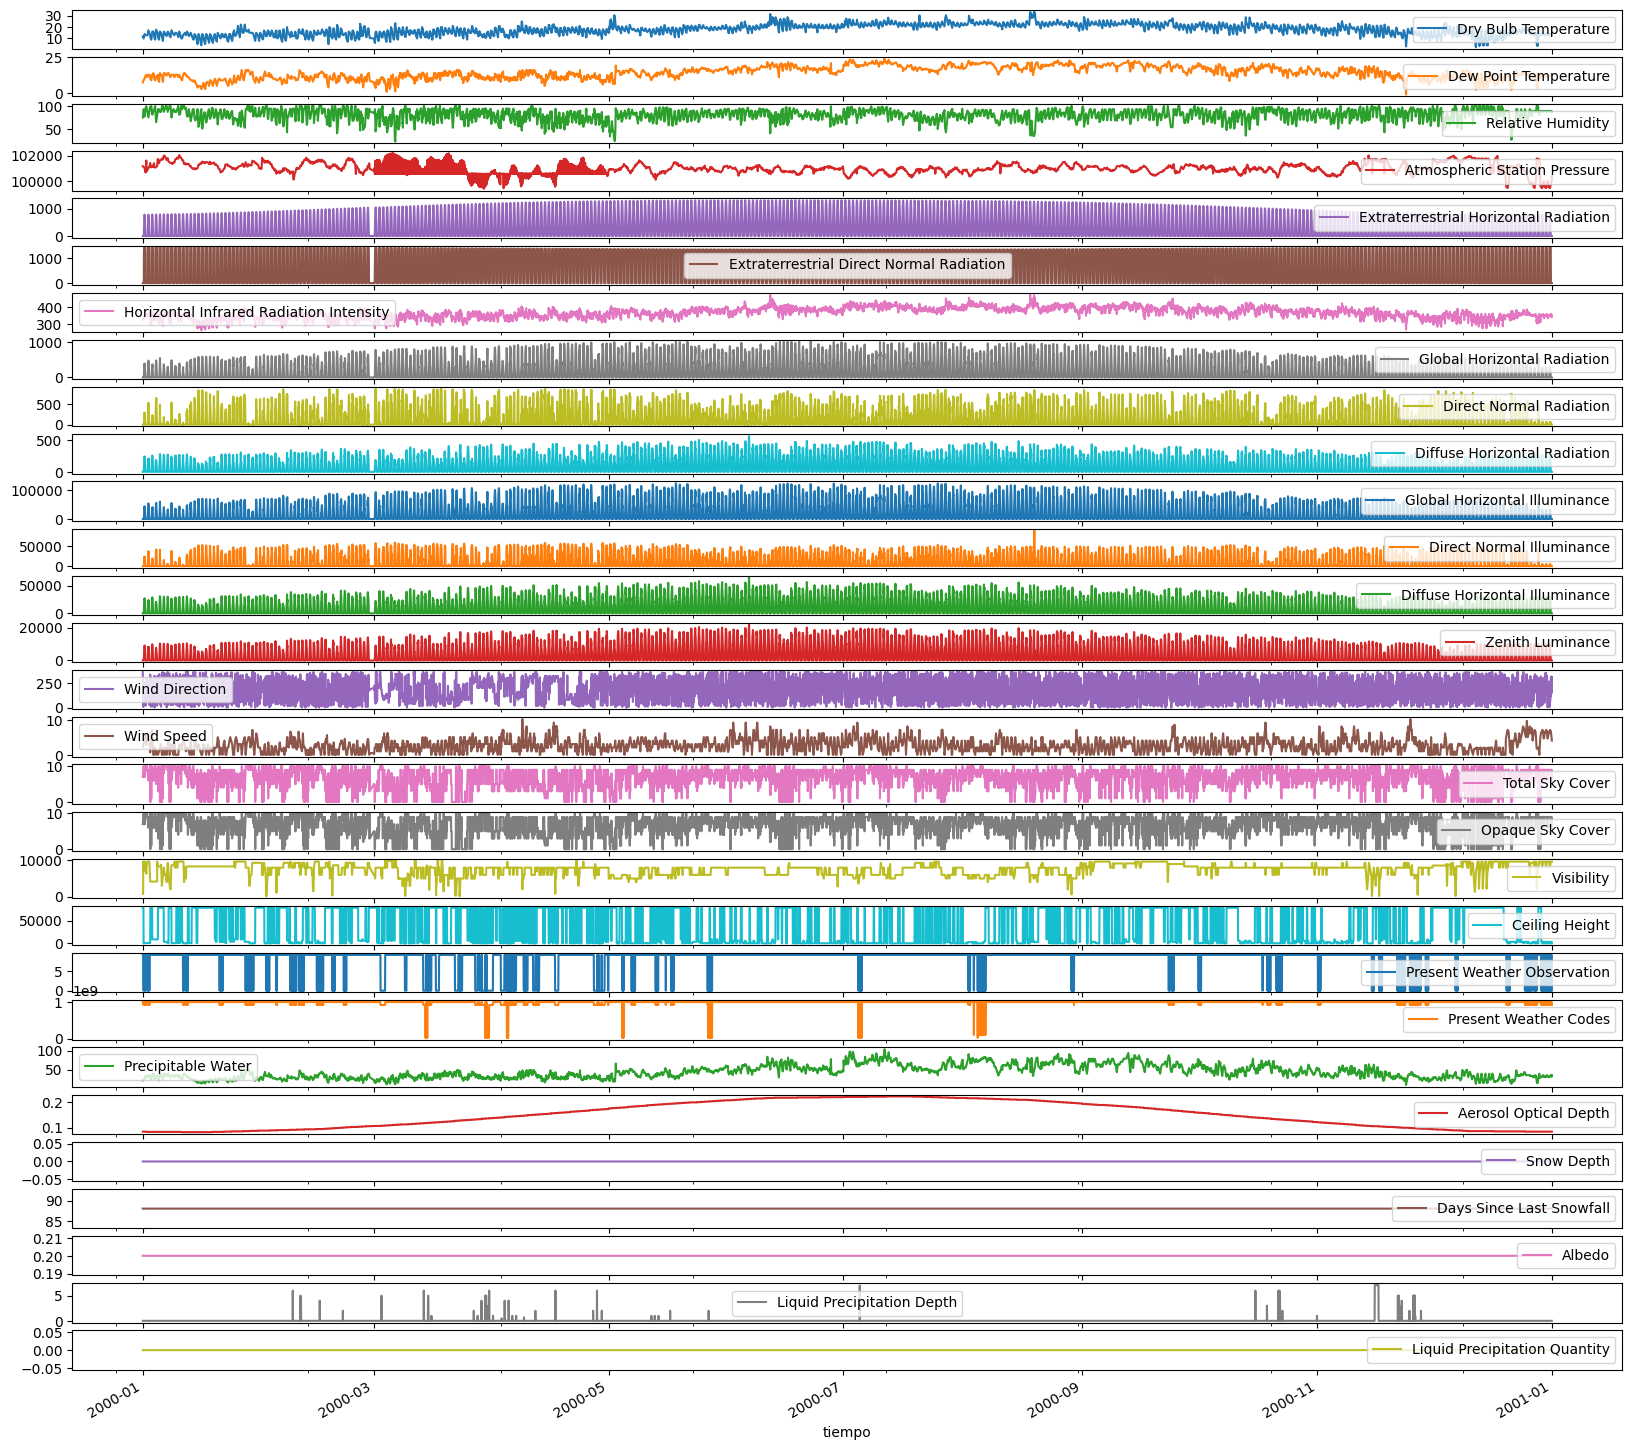

In [8]:
epw.plot(subplots=True,figsize=(20,20));

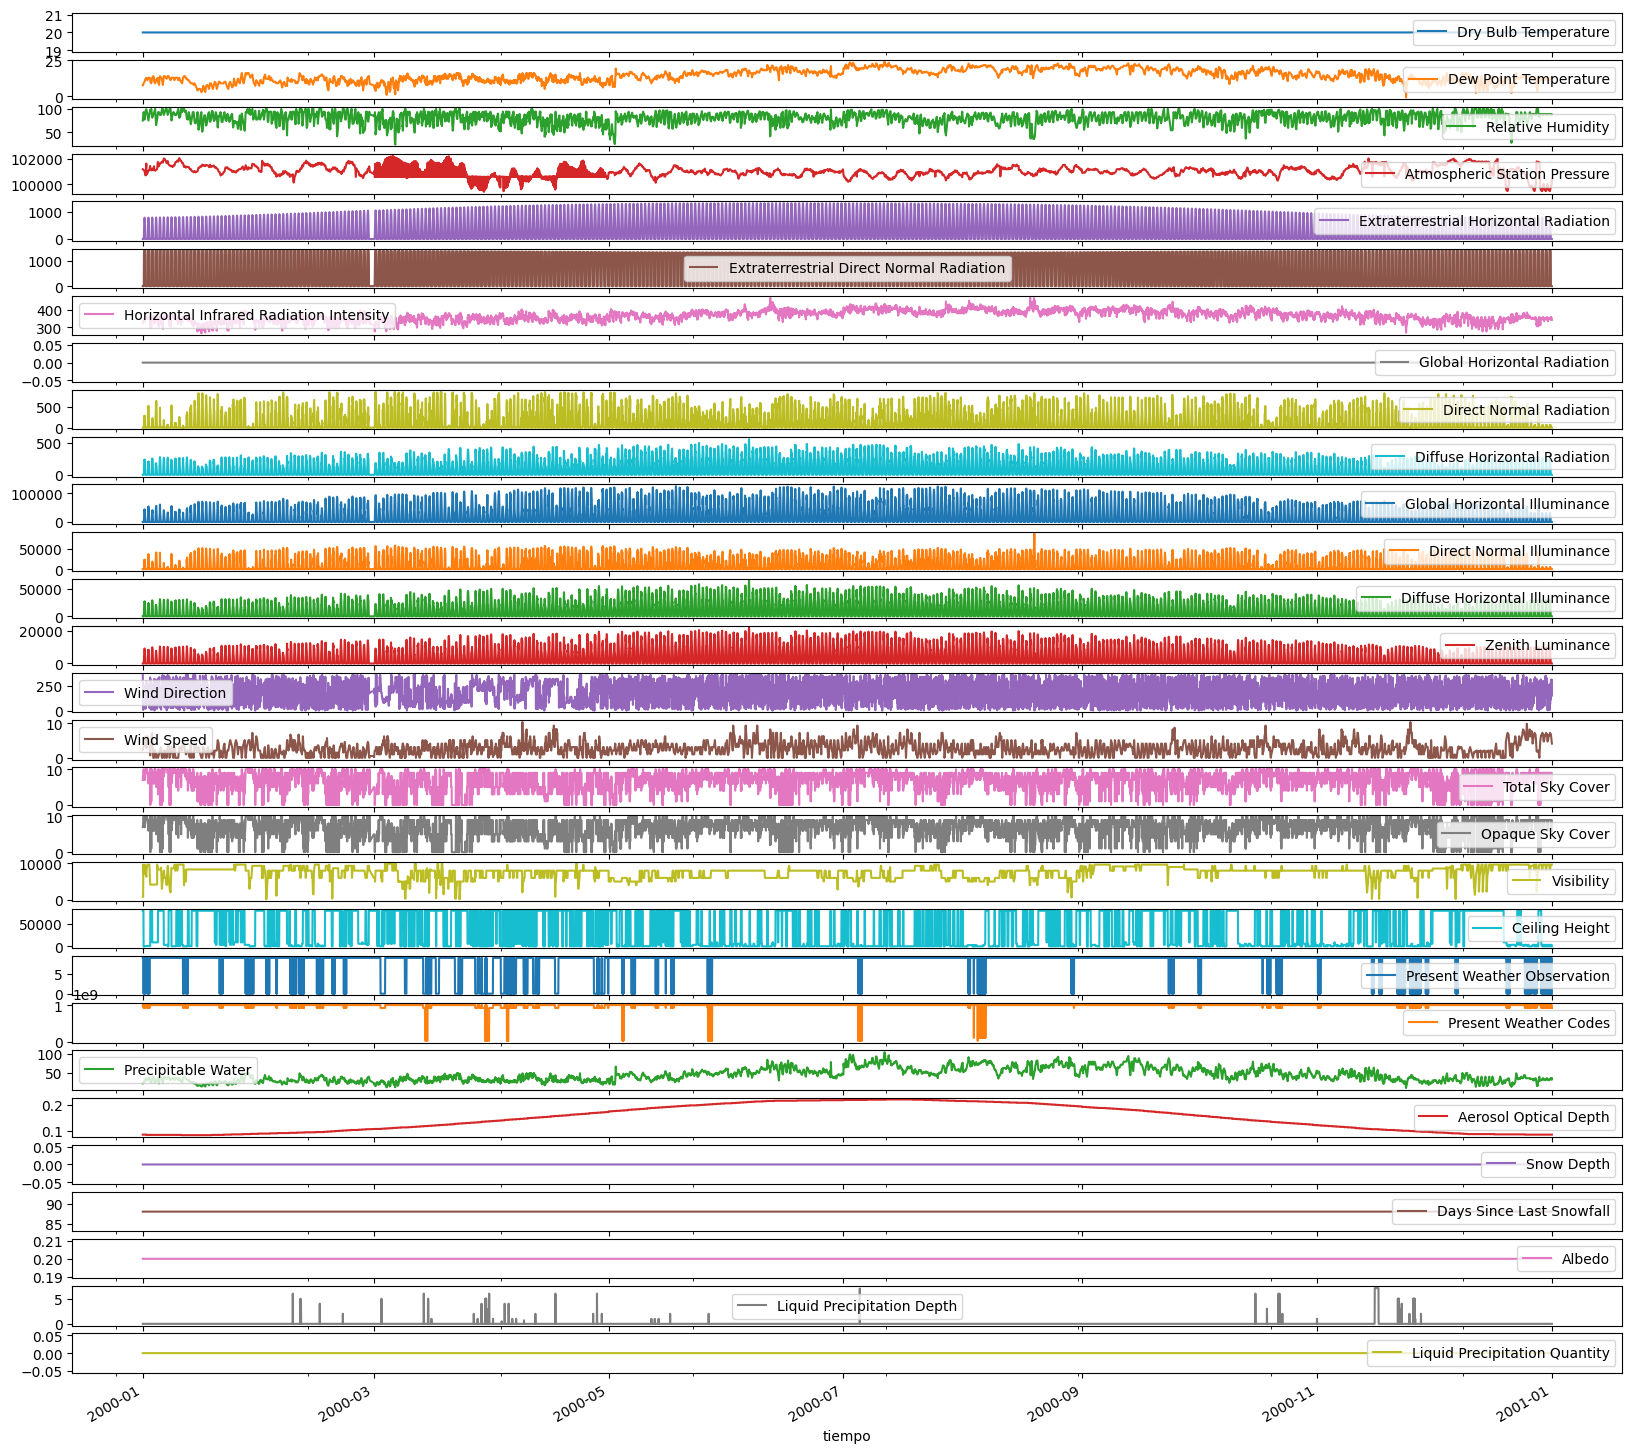

In [12]:
epw['Dry Bulb Temperature'] = 20
epw['Global Horizontal Radiation'] = 0.
epw.plot(subplots=True,figsize=(20,20));

In [10]:
epw.head(4)

,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,Extraterrestrial Horizontal Radiation,Extraterrestrial Direct Normal Radiation,Horizontal Infrared Radiation Intensity,Global Horizontal Radiation,Direct Normal Radiation,Diffuse Horizontal Radiation,Global Horizontal Illuminance,Direct Normal Illuminance,Diffuse Horizontal Illuminance,Zenith Luminance,Wind Direction,Wind Speed,Total Sky Cover,Opaque Sky Cover,Visibility,Ceiling Height,Present Weather Observation,Present Weather Codes,Precipitable Water,Aerosol Optical Depth,Snow Depth,Days Since Last Snowfall,Albedo,Liquid Precipitation Depth,Liquid Precipitation Quantity
tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01 01:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,20,7.5,75,101177,0,0,326,0,0,0,0,0,0,0,358,2.3,7,7,777.7,77777,9,999999999,21,0.085,0,88,0.2,0.0,0.0
2000-01-01 02:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,20,7.8,78,101166,0,0,325,0,0,0,0,0,0,0,198,2.4,7,7,777.7,77777,9,999999999,21,0.085,0,88,0.2,0.0,0.0
2000-01-01 03:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9*9*9*9*9*9*9,20,8.0,81,101155,0,0,329,0,0,0,0,0,0,0,269,2.6,8,8,777.7,77777,9,999999999,22,0.085,0,88,0.2,0.0,0.0
2000-01-01 04:00:00,?9?9?9?9E0?9?9?9*9*9?9?9?9?9*9?9?9*9*9*9*9*9,20,8.3,85,101144,0,0,327,0,0,0,0,0,0,0,7,2.8,8,8,9666.0,77777,9,999999999,22,0.085,0,88,0.2,0.0,0.0


In [14]:
to_epw('data/Ig0.epw',epw,'data/Casablanca.epw')

array([<Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>, <Axes: xlabel='tiempo'>,
       <Axes: xlabel='tiempo'>], dtype=object)

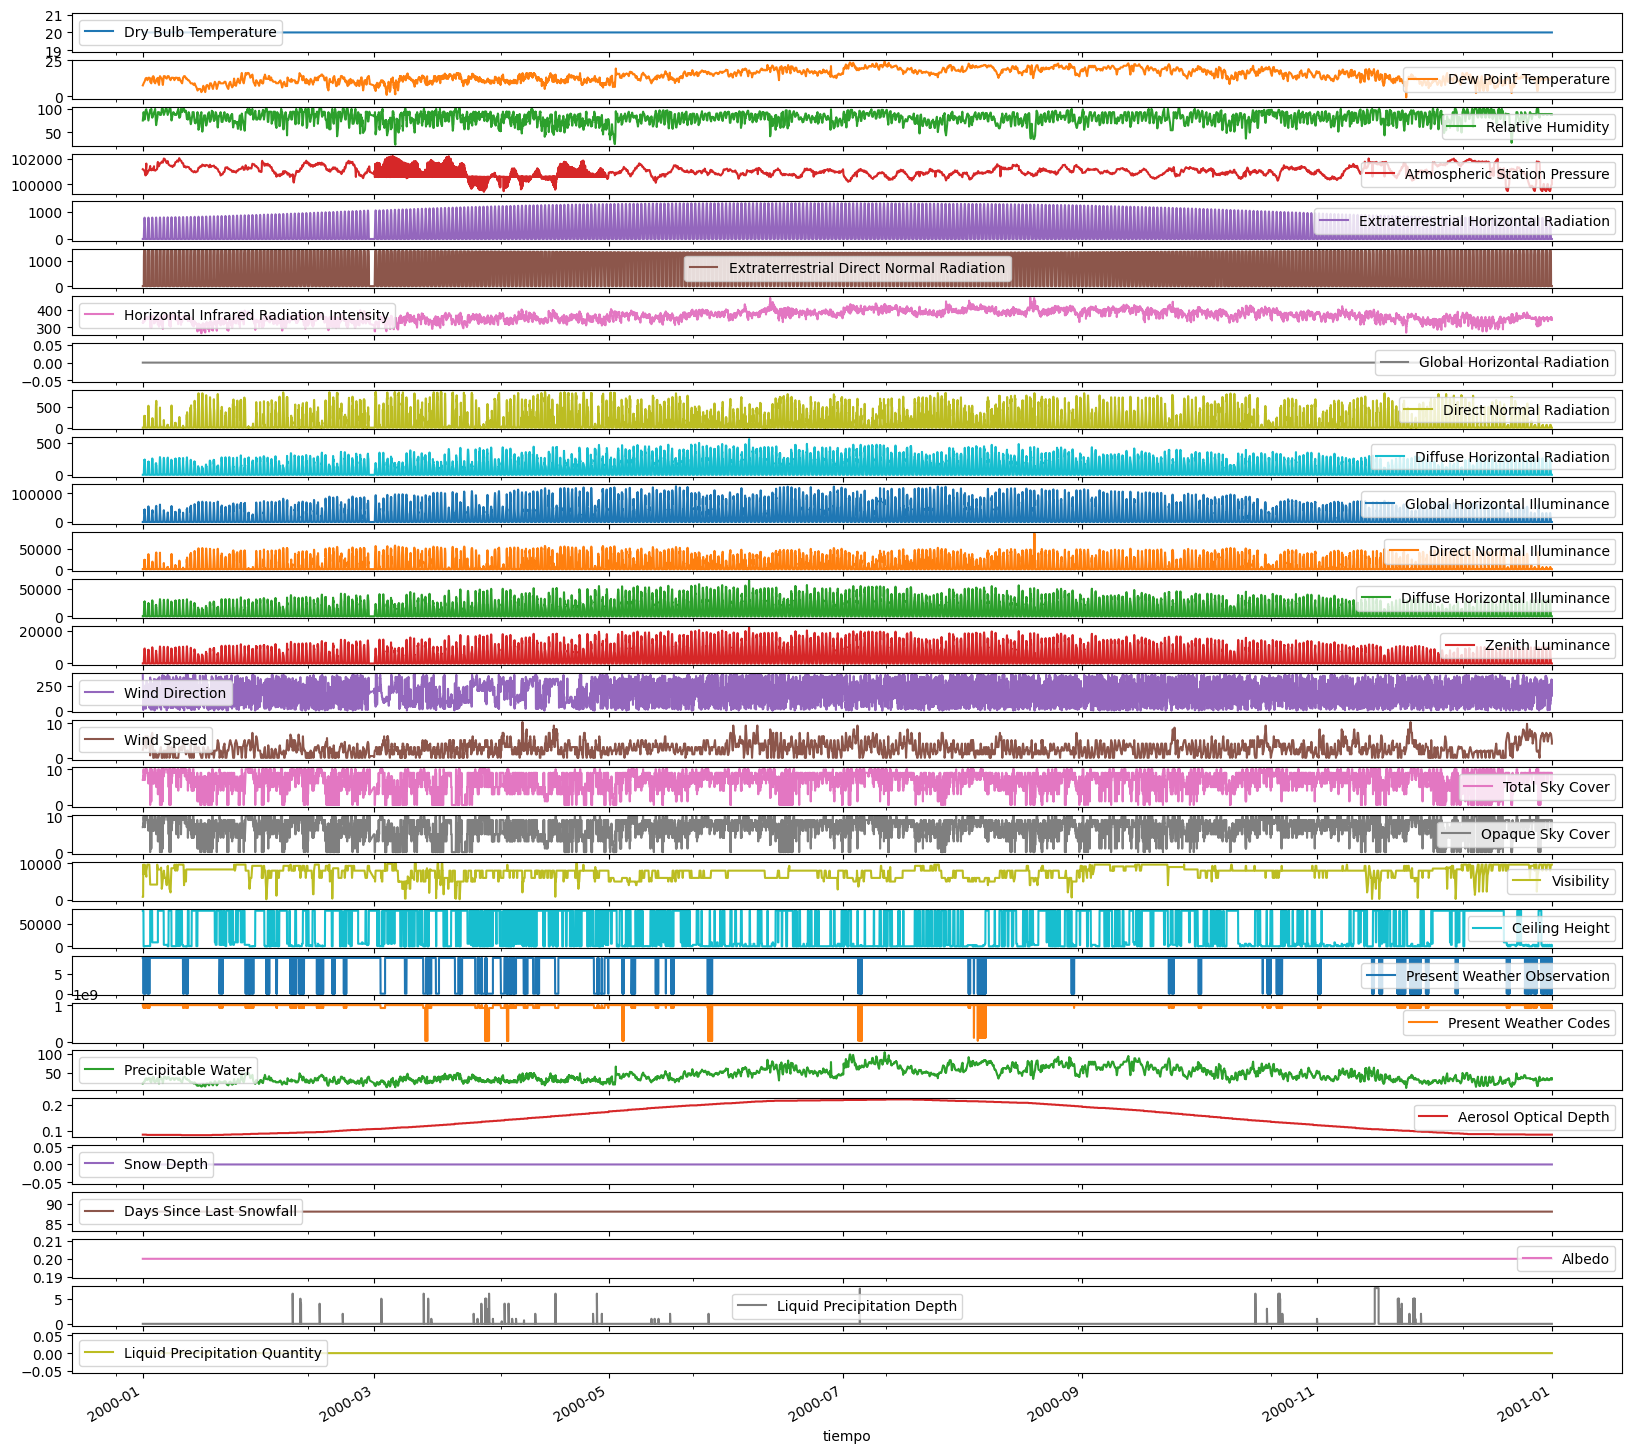

In [15]:
Ig0To20 = read_epw('data/Ig0.epw')
Ig0To20.plot(subplots=True, figsize=(20,20))